<a href="https://colab.research.google.com/github/khanhvy31/PJM_real_time_price/blob/main/PJM_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATA PREPROCESSING


Data is downloaded and compressed from PJM website, all raw data is preprocessed, combined before any further analysis

In [ ]:
# Sklearn and Pandas Setup
#@title import
import glob
import pandas as pd
import numpy as np
import datetime as dt
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from google.colab import drive
from sklearn.model_selection import train_test_split
import csv
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from scipy.stats import uniform, randint
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
from datetime import datetime
import numpy as np             
import pandas as pd            
import matplotlib.pylab as plt 
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

All Files downloaded from PJM.com are compressed to 1 zip folder, in order to load all file to Google colab I will connect Google colab to drive, unzip the folder and load all dataset to a master list

In [ ]:
#@title connect to drive
import zipfile
from google.colab import drive

drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
!mkdir content

In [ ]:
!cp /content/drive/MyDrive/PENN/Project/PJM_real_time.zip content
!cp /content/drive/MyDrive/PENN/Project/PJM_dayahead_hourly.zip content
!cp /content/drive/MyDrive/PENN/Project/PJM_meterload.zip content
!cp /content/drive/MyDrive/PENN/Project/PJM_Gencapacity.zip content
!cp /content/drive/MyDrive/PENN/Project/PJM_by_fuel.zip content


In [ ]:
!unzip /content/drive/MyDrive/PENN/Project/PJM_real_time.zip
!unzip /content/drive/MyDrive/PENN/Project/PJM_dayahead_hourly.zip
!unzip /content/drive/MyDrive/PENN/Project/PJM_meterload.zip
!unzip /content/drive/MyDrive/PENN/Project/PJM_Gencapacity.zip
!unzip /content/drive/MyDrive/PENN/Project/PJM_by_fuel.zip

Archive:  /content/drive/MyDrive/PENN/Project/PJM_real_time.zip
   creating: PJM real time/
  inflating: PJM real time/PJM_RealTime_Hourly_LMP_2018.csv  
  inflating: __MACOSX/PJM real time/._PJM_RealTime_Hourly_LMP_2018.csv  
  inflating: PJM real time/PJM_RealTime_Hourly_LMP_2014.csv  
  inflating: __MACOSX/PJM real time/._PJM_RealTime_Hourly_LMP_2014.csv  
  inflating: PJM real time/PJM_RealTime_Hourly_LMP_2015.csv  
  inflating: __MACOSX/PJM real time/._PJM_RealTime_Hourly_LMP_2015.csv  
  inflating: PJM real time/PJM_RealTime_Hourly_LMP_2017.csv  
  inflating: __MACOSX/PJM real time/._PJM_RealTime_Hourly_LMP_2017.csv  
  inflating: PJM real time/PJM_RealTime_Hourly_LMP_2016.csv  
  inflating: __MACOSX/PJM real time/._PJM_RealTime_Hourly_LMP_2016.csv  
  inflating: PJM real time/PJM_RealTime_Hourly_LMP_2013.csv  
  inflating: __MACOSX/PJM real time/._PJM_RealTime_Hourly_LMP_2013.csv  
Archive:  /content/drive/MyDrive/PENN/Project/PJM_dayahead_hourly.zip
   creating: PJM_dayahead_ho

#Helper Functions to load dataset

In [ ]:
def getpath_PJM_gencapacity():
  dir = 'PJM Gencapacity'
  path = '/content/PJM Gencapacity'
  dataset_path = path + "/"
  return [dataset_path + filename for filename in os.listdir(dir) if filename.endswith(".csv")]

In [ ]:
def getpath_PJM_byfuel():
  dir = 'PJM by fuel'
  path = '/content/PJM by fuel'
  dataset_path = path + "/"
  return [dataset_path + filename for filename in os.listdir(dir) if filename.endswith(".csv")]

In [ ]:
def getpath_PJM_meterload():
  dir = 'PJM meterload'
  path = '/content/PJM meterload'
  dataset_path = path + "/"
  return [dataset_path + filename for filename in os.listdir(dir) if filename.endswith(".csv")]

In [ ]:
def getpath_PJM_realtime():
  dir = 'PJM real time'
  path = '/content/PJM real time'
  dataset_path = path + "/"
  return [dataset_path + filename for filename in os.listdir(dir) if filename.endswith(".csv")]

In [ ]:
def getpath_PJM_dayahead():
  dir = 'PJM_dayahead_hourly'
  path = '/content/PJM_dayahead_hourly'
  dataset_path = path + "/"
  return [dataset_path + filename for filename in os.listdir(dir) if filename.endswith(".csv")]

In [ ]:
getpath_PJM_gencapacity()

['/content/PJM Gencapacity/PJM_GenCapacity_2014.csv',
 '/content/PJM Gencapacity/PJM_GenCapacity_2013.csv',
 '/content/PJM Gencapacity/PJM_GenCapacity_2018.csv',
 '/content/PJM Gencapacity/PJM_GenCapacity_2016.csv',
 '/content/PJM Gencapacity/PJM_GenCapacity_2015.csv',
 '/content/PJM Gencapacity/PJM_GenCapacity_2017.csv']

## Get all the data from gencapacity to 1 dataframe list

In [ ]:

dfs_gencapacity = []
for path in getpath_PJM_gencapacity():
  df = pd.read_csv(path)
  dfs_gencapacity.append(df)


In [ ]:
dfs_byfuel = []
for path in getpath_PJM_byfuel():
  df = pd.read_csv(path)
  dfs_byfuel.append(df)


In [ ]:
dfs_meterload = []
for path in getpath_PJM_meterload():
  df = pd.read_csv(path)
  dfs_meterload.append(df)


In [ ]:
dfs_realtime = []
for path in getpath_PJM_realtime():
  df = pd.read_csv(path)
  dfs_realtime.append(df)

In [ ]:
dfs_dayahead_hourly = []
for path in getpath_PJM_dayahead():
  df = pd.read_csv(path)
  dfs_dayahead_hourly.append(df)

Now I have the master list of dataset, I am going to do EDA to explore each dataset and see if I could merge them to the final dataset for modeling purposes.

In [ ]:
# final_df = dfs[0] #try to merge
# for df in dfs[1:]:
#   final_df = pd.merge(final_df, df)

In [ ]:
# for i in range(len(dfs)):
#   print(dfs[i].head())


Initial thought: All datasets have the same column "datetime" with different range, hopefully we can merge on the column and find the range with enough information where we can do the model 

In [ ]:
gencapacity_df = dfs_gencapacity[0] #try to concat
for df in dfs_gencapacity[1:]:
  gencapacity_df = pd.concat ([gencapacity_df, df])

In [ ]:
gencapacity_df = gencapacity_df.dropna()

In [ ]:
by_fuel_df = dfs_byfuel[0]
for df in dfs_byfuel[1:]:
  by_fuel_df = pd.concat([by_fuel_df,df])

In [ ]:
by_fuel_df = by_fuel_df.dropna()

In [ ]:
by_fuel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287624 entries, 0 to 95237
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   datetime_beginning_utc    287624 non-null  object 
 1   datetime_beginning_ept    287624 non-null  object 
 2   fuel_type                 287624 non-null  object 
 3   mw                        287624 non-null  float64
 4   fuel_percentage_of_total  287624 non-null  float64
 5   is_renewable              287624 non-null  bool   
dtypes: bool(1), float64(2), object(3)
memory usage: 13.4+ MB


In [ ]:
meterload_df = dfs_meterload[0]
for df in dfs_meterload[1:]:
  meterload_df = pd.concat([meterload_df,df])

In [ ]:
realtime_df = dfs_realtime[0]
for df in dfs_realtime[1:]:
  realtime_df = pd.concat([realtime_df,df])

In [ ]:
realtime_df = realtime_df.drop(columns = ['voltage','equipment','zone'])

In [ ]:
realtime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155662 entries, 0 to 194853
Data columns (total 11 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   datetime_beginning_utc  1155662 non-null  object 
 1   datetime_beginning_ept  1155662 non-null  object 
 2   pnode_id                1155662 non-null  int64  
 3   pnode_name              1155662 non-null  object 
 4   type                    1155662 non-null  object 
 5   system_energy_price_rt  1155662 non-null  float64
 6   total_lmp_rt            1155662 non-null  float64
 7   congestion_price_rt     1155662 non-null  float64
 8   marginal_loss_price_rt  1155662 non-null  float64
 9   row_is_current          1155662 non-null  bool   
 10  version_nbr             1155662 non-null  int64  
dtypes: bool(1), float64(4), int64(2), object(4)
memory usage: 98.1+ MB


In [ ]:
dayahead_df = dfs_dayahead_hourly[0]
for df in dfs_dayahead_hourly[1:]:
  dayahead_df = pd.concat([dayahead_df,df])

In [ ]:
dayahead_df = dayahead_df.drop(columns =['voltage','equipment','zone'])

In [ ]:
dayahead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1150910 entries, 0 to 192213
Data columns (total 11 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   datetime_beginning_utc  1150910 non-null  object 
 1   datetime_beginning_ept  1150910 non-null  object 
 2   pnode_id                1150910 non-null  int64  
 3   pnode_name              1150910 non-null  object 
 4   type                    1150910 non-null  object 
 5   system_energy_price_da  1150910 non-null  float64
 6   total_lmp_da            1150910 non-null  float64
 7   congestion_price_da     1150910 non-null  float64
 8   marginal_loss_price_da  1150910 non-null  float64
 9   row_is_current          1150910 non-null  bool   
 10  version_nbr             1150910 non-null  int64  
dtypes: bool(1), float64(4), int64(2), object(4)
memory usage: 97.7+ MB


##Merge all dataframe 

###Merging and cleaning data

In [ ]:
gencapacity_df.head()

,bid_datetime_beginning_utc,bid_datetime_beginning_ept,eco_max,emerg_max,total_committed
0,1/1/2014 5:00:00 AM,1/1/2014 12:00:00 AM,163404.3,170023.0,177457.6
1,1/1/2014 6:00:00 AM,1/1/2014 1:00:00 AM,163466.3,170078.5,177457.6
2,1/1/2014 7:00:00 AM,1/1/2014 2:00:00 AM,163157.5,169884.2,177457.6
3,1/1/2014 8:00:00 AM,1/1/2014 3:00:00 AM,162725.4,169448.9,177457.6
4,1/1/2014 9:00:00 AM,1/1/2014 4:00:00 AM,163614.1,170244.0,177457.6


In [ ]:
by_fuel_df.head()

,datetime_beginning_utc,datetime_beginning_ept,fuel_type,mw,fuel_percentage_of_total,is_renewable
0,12/31/2018 5:00:00 AM,12/31/2018 12:00:00 AM,Coal,20227.0,0.24,False
1,12/31/2018 5:00:00 AM,12/31/2018 12:00:00 AM,Gas,23483.5,0.27,False
2,12/31/2018 5:00:00 AM,12/31/2018 12:00:00 AM,Hydro,2064.8,0.02,True
3,12/31/2018 5:00:00 AM,12/31/2018 12:00:00 AM,Multiple Fuels,3.2,0.00,False
4,12/31/2018 5:00:00 AM,12/31/2018 12:00:00 AM,Nuclear,34845.2,0.41,False


In [ ]:
meterload_df  = meterload_df.groupby('datetime_beginning_utc')[['mw']].mean()

In [ ]:
meterload_df.head()

,mw
datetime_beginning_utc,
1/1/2013 10:00:00 AM,6947.556273
1/1/2013 10:00:00 PM,8871.545545
1/1/2013 11:00:00 AM,7104.764636
1/1/2013 11:00:00 PM,9062.532091
1/1/2013 12:00:00 PM,7231.443909


###keeping the pnode_name == PJM-RTO

In [ ]:
realtime_df = realtime_df[realtime_df['pnode_name'] == 'PJM-RTO']

In [ ]:
realtime_df

,datetime_beginning_utc,datetime_beginning_ept,pnode_id,pnode_name,type,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,row_is_current,version_nbr
0,1/1/2015 5:00:00 AM,1/1/2015 12:00:00 AM,1,PJM-RTO,ZONE,27.90,27.932043,0.015272,0.016771,True,1
22,1/1/2015 6:00:00 AM,1/1/2015 1:00:00 AM,1,PJM-RTO,ZONE,27.89,27.924257,0.021155,0.013101,True,1
44,1/1/2015 7:00:00 AM,1/1/2015 2:00:00 AM,1,PJM-RTO,ZONE,27.33,27.360293,0.021703,0.008590,True,1
66,1/1/2015 8:00:00 AM,1/1/2015 3:00:00 AM,1,PJM-RTO,ZONE,27.07,27.100068,0.018235,0.011833,True,1
88,1/1/2015 9:00:00 AM,1/1/2015 4:00:00 AM,1,PJM-RTO,ZONE,26.21,26.250975,0.025782,0.015193,True,1
...,...,...,...,...,...,...,...,...,...,...,...
194744,12/31/2016 1:00:00 AM,12/30/2016 8:00:00 PM,1,PJM-RTO,ZONE,26.76,26.763961,-0.000678,0.004639,True,1
194766,12/31/2016 2:00:00 AM,12/30/2016 9:00:00 PM,1,PJM-RTO,ZONE,28.09,28.104594,0.001908,0.012686,True,1
194788,12/31/2016 3:00:00 AM,12/30/2016 10:00:00 PM,1,PJM-RTO,ZONE,26.54,26.551182,0.004853,0.006329,True,1
194810,12/31/2016 4:00:00 AM,12/30/2016 11:00:00 PM,1,PJM-RTO,ZONE,26.83,26.843044,0.004126,0.008918,True,1


In [ ]:
dayahead_df = dayahead_df[dayahead_df['pnode_name']=='PJM-RTO']

total_lmp_rt is the label column, other columns will be features. Therefore, all merge tables will be based on realtime_df

In [ ]:
merge_1 = pd.merge(left = realtime_df, right = gencapacity_df, left_on = 'datetime_beginning_utc', right_on = 'bid_datetime_beginning_utc',how = 'left')


###drop NA after 1st merge

In [ ]:
merge_1 = merge_1.dropna()

In [ ]:
merge_1

,datetime_beginning_utc,datetime_beginning_ept,pnode_id,pnode_name,type,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,row_is_current,version_nbr,bid_datetime_beginning_utc,bid_datetime_beginning_ept,eco_max,emerg_max,total_committed
0,1/1/2015 5:00:00 AM,1/1/2015 12:00:00 AM,1,PJM-RTO,ZONE,27.90,27.932043,0.015272,0.016771,True,1,1/1/2015 5:00:00 AM,1/1/2015 12:00:00 AM,168165.2,174843.2,178120.5
1,1/1/2015 6:00:00 AM,1/1/2015 1:00:00 AM,1,PJM-RTO,ZONE,27.89,27.924257,0.021155,0.013101,True,1,1/1/2015 6:00:00 AM,1/1/2015 1:00:00 AM,167688.7,174373.9,178120.5
2,1/1/2015 7:00:00 AM,1/1/2015 2:00:00 AM,1,PJM-RTO,ZONE,27.33,27.360293,0.021703,0.008590,True,1,1/1/2015 7:00:00 AM,1/1/2015 2:00:00 AM,167618.6,174378.8,178120.5
3,1/1/2015 8:00:00 AM,1/1/2015 3:00:00 AM,1,PJM-RTO,ZONE,27.07,27.100068,0.018235,0.011833,True,1,1/1/2015 8:00:00 AM,1/1/2015 3:00:00 AM,168628.2,175390.8,178120.5
4,1/1/2015 9:00:00 AM,1/1/2015 4:00:00 AM,1,PJM-RTO,ZONE,26.21,26.250975,0.025782,0.015193,True,1,1/1/2015 9:00:00 AM,1/1/2015 4:00:00 AM,168704.5,175368.3,178120.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52657,12/31/2016 1:00:00 AM,12/30/2016 8:00:00 PM,1,PJM-RTO,ZONE,26.76,26.763961,-0.000678,0.004639,True,1,12/31/2016 1:00:00 AM,12/30/2016 8:00:00 PM,181251.2,185007.8,176673.0
52658,12/31/2016 2:00:00 AM,12/30/2016 9:00:00 PM,1,PJM-RTO,ZONE,28.09,28.104594,0.001908,0.012686,True,1,12/31/2016 2:00:00 AM,12/30/2016 9:00:00 PM,179394.3,184286.8,176673.0
52659,12/31/2016 3:00:00 AM,12/30/2016 10:00:00 PM,1,PJM-RTO,ZONE,26.54,26.551182,0.004853,0.006329,True,1,12/31/2016 3:00:00 AM,12/30/2016 10:00:00 PM,179344.7,184415.9,176673.0
52660,12/31/2016 4:00:00 AM,12/30/2016 11:00:00 PM,1,PJM-RTO,ZONE,26.83,26.843044,0.004126,0.008918,True,1,12/31/2016 4:00:00 AM,12/30/2016 11:00:00 PM,177734.2,183356.4,176673.0


In [ ]:
merge_2 = pd.merge(left = merge_1, right = dayahead_df, left_on = 'datetime_beginning_utc', right_on = 'datetime_beginning_utc', how = 'left' )

###dropna after 2nd merge


In [ ]:
merge_2.dropna()

,datetime_beginning_utc,datetime_beginning_ept_x,pnode_id_x,pnode_name_x,type_x,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,row_is_current_x,...,datetime_beginning_ept_y,pnode_id_y,pnode_name_y,type_y,system_energy_price_da,total_lmp_da,congestion_price_da,marginal_loss_price_da,row_is_current_y,version_nbr_y
0,1/1/2015 5:00:00 AM,1/1/2015 12:00:00 AM,1,PJM-RTO,ZONE,27.90,27.932043,0.015272,0.016771,True,...,1/1/2015 12:00:00 AM,1,PJM-RTO,ZONE,28.11,28.150167,0.042907,-0.002740,True,1
1,1/1/2015 6:00:00 AM,1/1/2015 1:00:00 AM,1,PJM-RTO,ZONE,27.89,27.924257,0.021155,0.013101,True,...,1/1/2015 1:00:00 AM,1,PJM-RTO,ZONE,27.83,27.890196,0.055377,0.004819,True,1
2,1/1/2015 7:00:00 AM,1/1/2015 2:00:00 AM,1,PJM-RTO,ZONE,27.33,27.360293,0.021703,0.008590,True,...,1/1/2015 2:00:00 AM,1,PJM-RTO,ZONE,27.24,27.284051,0.046938,-0.002887,True,1
3,1/1/2015 8:00:00 AM,1/1/2015 3:00:00 AM,1,PJM-RTO,ZONE,27.07,27.100068,0.018235,0.011833,True,...,1/1/2015 3:00:00 AM,1,PJM-RTO,ZONE,26.44,26.471545,0.036696,-0.005151,True,1
4,1/1/2015 9:00:00 AM,1/1/2015 4:00:00 AM,1,PJM-RTO,ZONE,26.21,26.250975,0.025782,0.015193,True,...,1/1/2015 4:00:00 AM,1,PJM-RTO,ZONE,26.83,26.861173,0.036685,-0.005512,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52624,12/31/2016 1:00:00 AM,12/30/2016 8:00:00 PM,1,PJM-RTO,ZONE,26.76,26.763961,-0.000678,0.004639,True,...,12/30/2016 8:00:00 PM,1,PJM-RTO,ZONE,32.84,33.442840,0.236220,0.366620,True,1
52625,12/31/2016 2:00:00 AM,12/30/2016 9:00:00 PM,1,PJM-RTO,ZONE,28.09,28.104594,0.001908,0.012686,True,...,12/30/2016 9:00:00 PM,1,PJM-RTO,ZONE,31.55,31.973737,0.114634,0.309103,True,1
52626,12/31/2016 3:00:00 AM,12/30/2016 10:00:00 PM,1,PJM-RTO,ZONE,26.54,26.551182,0.004853,0.006329,True,...,12/30/2016 10:00:00 PM,1,PJM-RTO,ZONE,27.01,27.379378,0.104945,0.264433,True,1
52627,12/31/2016 4:00:00 AM,12/30/2016 11:00:00 PM,1,PJM-RTO,ZONE,26.83,26.843044,0.004126,0.008918,True,...,12/30/2016 11:00:00 PM,1,PJM-RTO,ZONE,25.77,25.939305,-0.036394,0.205699,True,1


In [ ]:
final_df = merge_2[['datetime_beginning_utc','system_energy_price_rt','total_lmp_rt','congestion_price_rt','marginal_loss_price_rt','eco_max','emerg_max','system_energy_price_da','total_lmp_da','congestion_price_da','marginal_loss_price_da']]

In [ ]:
final_df

,datetime_beginning_utc,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,eco_max,emerg_max,system_energy_price_da,total_lmp_da,congestion_price_da,marginal_loss_price_da
0,1/1/2015 5:00:00 AM,27.90,27.932043,0.015272,0.016771,168165.2,174843.2,28.11,28.150167,0.042907,-0.002740
1,1/1/2015 6:00:00 AM,27.89,27.924257,0.021155,0.013101,167688.7,174373.9,27.83,27.890196,0.055377,0.004819
2,1/1/2015 7:00:00 AM,27.33,27.360293,0.021703,0.008590,167618.6,174378.8,27.24,27.284051,0.046938,-0.002887
3,1/1/2015 8:00:00 AM,27.07,27.100068,0.018235,0.011833,168628.2,175390.8,26.44,26.471545,0.036696,-0.005151
4,1/1/2015 9:00:00 AM,26.21,26.250975,0.025782,0.015193,168704.5,175368.3,26.83,26.861173,0.036685,-0.005512
...,...,...,...,...,...,...,...,...,...,...,...
52624,12/31/2016 1:00:00 AM,26.76,26.763961,-0.000678,0.004639,181251.2,185007.8,32.84,33.442840,0.236220,0.366620
52625,12/31/2016 2:00:00 AM,28.09,28.104594,0.001908,0.012686,179394.3,184286.8,31.55,31.973737,0.114634,0.309103
52626,12/31/2016 3:00:00 AM,26.54,26.551182,0.004853,0.006329,179344.7,184415.9,27.01,27.379378,0.104945,0.264433
52627,12/31/2016 4:00:00 AM,26.83,26.843044,0.004126,0.008918,177734.2,183356.4,25.77,25.939305,-0.036394,0.205699


In [ ]:
x = final_df['datetime_beginning_utc']
y = final_df['total_lmp_rt']

#EDA - Exploratory data analysis


##Linechart to show the trend of the historical data based on real time price

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


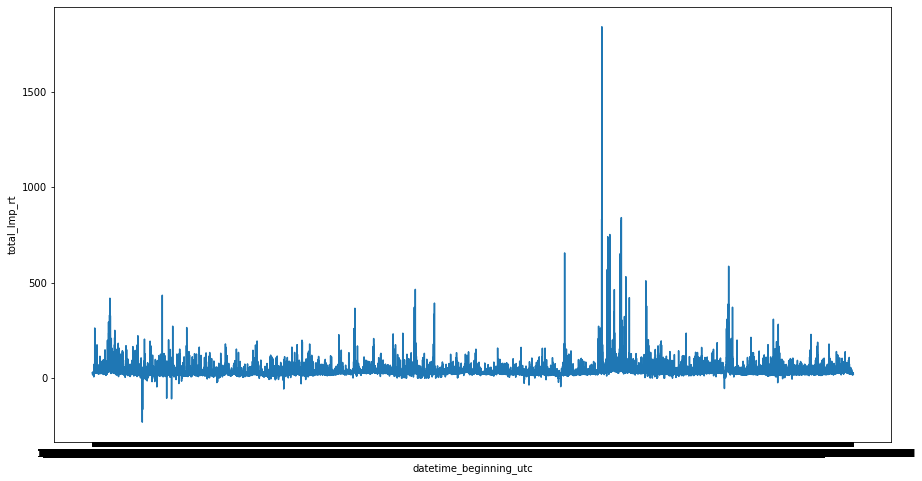

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(x,y)


In [ ]:
final_df.head()

,datetime_beginning_utc,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,eco_max,emerg_max,system_energy_price_da,total_lmp_da,congestion_price_da,marginal_loss_price_da
0,1/1/2015 5:00:00 AM,27.90,27.932043,0.015272,0.016771,168165.2,174843.2,28.11,28.150167,0.042907,-0.002740
1,1/1/2015 6:00:00 AM,27.89,27.924257,0.021155,0.013101,167688.7,174373.9,27.83,27.890196,0.055377,0.004819
2,1/1/2015 7:00:00 AM,27.33,27.360293,0.021703,0.008590,167618.6,174378.8,27.24,27.284051,0.046938,-0.002887
3,1/1/2015 8:00:00 AM,27.07,27.100068,0.018235,0.011833,168628.2,175390.8,26.44,26.471545,0.036696,-0.005151
4,1/1/2015 9:00:00 AM,26.21,26.250975,0.025782,0.015193,168704.5,175368.3,26.83,26.861173,0.036685,-0.005512


##Create Correlation Heatmap 


In [ ]:
corr_df = final_df.drop(columns = 'datetime_beginning_utc')

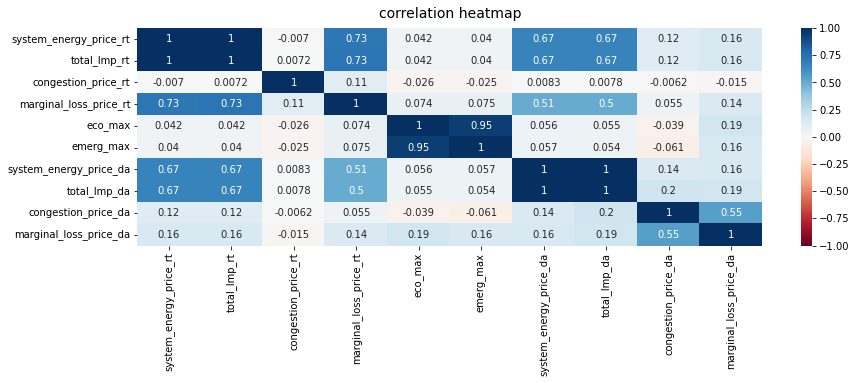

In [ ]:
corr_matrix = corr_df.corr()
plt.figure(figsize = (14,4))
heatmap = sns.heatmap(corr_matrix, vmin = -1, vmax = 1, annot = True, cmap = 'RdBu')
heatmap.set_title('correlation heatmap',fontdict = {'fontsize':14},pad=10);

There is a perfect correlation between total real time price and system_energy_price, therefore, let's drop the columns system_energy_price and make the correlation matrix again

In [ ]:
final_df = final_df.drop(columns = 'system_energy_price_rt')

In [ ]:
final_df = final_df.drop(columns = 'system_energy_price_da')

In [ ]:
final_df = final_df.drop(columns = 'eco_max')

In [ ]:
corr_df = final_df.drop(columns = 'datetime_beginning_utc')

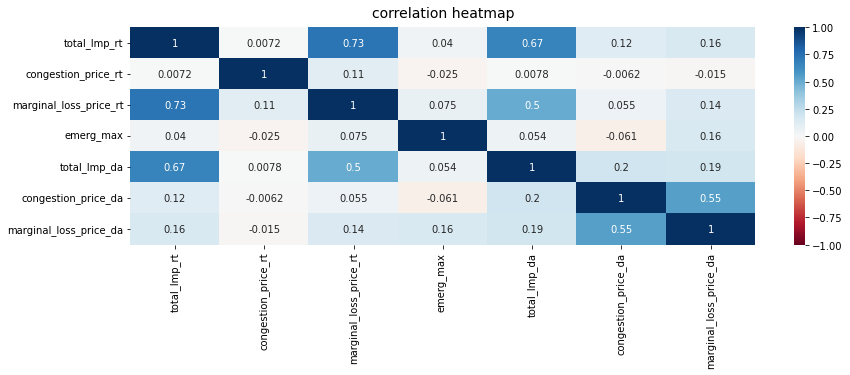

In [ ]:
corr_matrix = corr_df.corr()
plt.figure(figsize = (14,4))
heatmap = sns.heatmap(corr_matrix, vmin = -1, vmax = 1, annot = True, cmap = 'RdBu')
heatmap.set_title('correlation heatmap',fontdict = {'fontsize':14},pad=10);

In [ ]:
final_df.head()

,datetime_beginning_utc,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,emerg_max,total_lmp_da,congestion_price_da,marginal_loss_price_da
0,1/1/2015 5:00:00 AM,27.932043,0.015272,0.016771,174843.2,28.150167,0.042907,-0.002740
1,1/1/2015 6:00:00 AM,27.924257,0.021155,0.013101,174373.9,27.890196,0.055377,0.004819
2,1/1/2015 7:00:00 AM,27.360293,0.021703,0.008590,174378.8,27.284051,0.046938,-0.002887
3,1/1/2015 8:00:00 AM,27.100068,0.018235,0.011833,175390.8,26.471545,0.036696,-0.005151
4,1/1/2015 9:00:00 AM,26.250975,0.025782,0.015193,175368.3,26.861173,0.036685,-0.005512


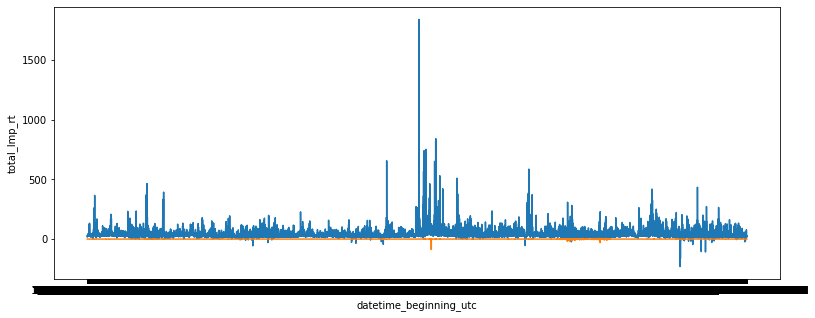

In [ ]:
plt.figure(figsize=(13,5))
sns.lineplot(data=final_df, x="datetime_beginning_utc", y="total_lmp_rt")
sns.lineplot(data=final_df, x="datetime_beginning_utc", y="congestion_price_rt")


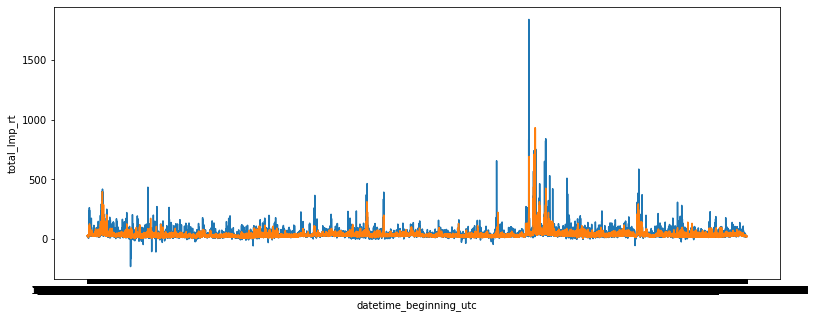

In [ ]:
plt.figure(figsize=(13,5))
sns.lineplot(data=final_df, x="datetime_beginning_utc", y="total_lmp_rt")
sns.lineplot(data=final_df, x="datetime_beginning_utc", y="system_energy_price_da")

There is an outlier based on the linegraph, let's create new columns year, month, hour to learn more about the outlier

##Create a new column "Month" to see if there is any seasonality within month of the year for further analysis

In [ ]:
final_df['month'] = final_df['datetime_beginning_utc'].apply(lambda x: dt.datetime.strptime(str(x),'%m/%d/%Y %H:%M:%S %p').month)


##Create a new column "hour" to see if there is any seasonality within hour of day

In [ ]:
final_df['hour'] = final_df['datetime_beginning_utc'].apply(lambda x: dt.datetime.strptime(str(x),'%m/%d/%Y %I:%M:%S %p').hour) #using I instead of H because of AM and PM hour format


##Create new column "Year" to see if there is any seasonality within range 2015-2016

In [ ]:
final_df['year'] = final_df['datetime_beginning_utc'].apply(lambda x: dt.datetime.strptime(str(x),'%m/%d/%Y %H:%M:%S %p').year)


In [ ]:
final_df

,datetime_beginning_utc,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,emerg_max,total_lmp_da,congestion_price_da,marginal_loss_price_da,month,hour,year
0,1/1/2015 5:00:00 AM,27.932043,0.015272,0.016771,174843.2,28.150167,0.042907,-0.002740,1,5,2015
1,1/1/2015 6:00:00 AM,27.924257,0.021155,0.013101,174373.9,27.890196,0.055377,0.004819,1,6,2015
2,1/1/2015 7:00:00 AM,27.360293,0.021703,0.008590,174378.8,27.284051,0.046938,-0.002887,1,7,2015
3,1/1/2015 8:00:00 AM,27.100068,0.018235,0.011833,175390.8,26.471545,0.036696,-0.005151,1,8,2015
4,1/1/2015 9:00:00 AM,26.250975,0.025782,0.015193,175368.3,26.861173,0.036685,-0.005512,1,9,2015
...,...,...,...,...,...,...,...,...,...,...,...
52624,12/31/2016 1:00:00 AM,26.763961,-0.000678,0.004639,185007.8,33.442840,0.236220,0.366620,12,1,2016
52625,12/31/2016 2:00:00 AM,28.104594,0.001908,0.012686,184286.8,31.973737,0.114634,0.309103,12,2,2016
52626,12/31/2016 3:00:00 AM,26.551182,0.004853,0.006329,184415.9,27.379378,0.104945,0.264433,12,3,2016
52627,12/31/2016 4:00:00 AM,26.843044,0.004126,0.008918,183356.4,25.939305,-0.036394,0.205699,12,4,2016


##Line Chart for monthly real time price change by year

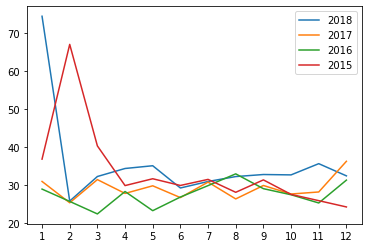

In [ ]:
y1 = final_df.loc[final_df['year'] == 2018].groupby('month')[['total_lmp_rt']].mean()
y2 = final_df.loc[final_df['year'] == 2017].groupby('month')[['total_lmp_rt']].mean()
y3 = final_df.loc[final_df['year'] == 2016].groupby('month')[['total_lmp_rt']].mean()
y4 = final_df.loc[final_df['year'] == 2015].groupby('month')[['total_lmp_rt']].mean()
fig, ax = plt.subplots()
ax.set_xticks(np.arange(1,13,1))
plt.plot(y1,label = '2018')
plt.plot(y2,label = '2017')
plt.plot(y3, label = '2016')
plt.plot(y4, label = '2015')
plt.legend()

There are outliers in January 2018 and Febuary 2015

##Line Chart for 2018 hourly real time price change

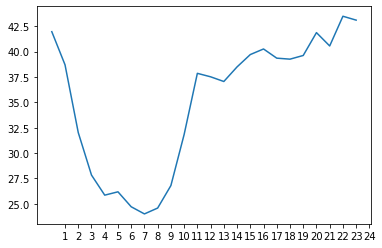

In [ ]:
y = final_df.groupby('hour')[['total_lmp_rt']].mean()
fig, ax = plt.subplots()
ax.set_xticks(np.arange(1,25,1))
plt.plot(y)

Real time price decreases during the day time where people go to work, around 7 and 8, it starts to increase. It also can be interpreted as the whether at night get colder, therefore, people use more heater than day time

##Line Chart for yearly real time price change

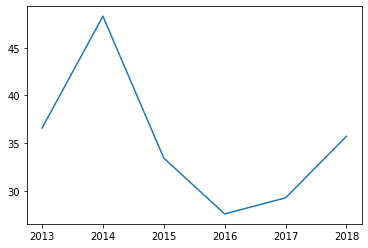

In [ ]:
y = final_df.groupby('year')[['total_lmp_rt']].mean()
fig, ax = plt.subplots()
plt.plot(y)

Average of real time price is highest in 2014 and loweest in 2016. There is no trend from 2013 to 2018

##ecomax and engergymax by month

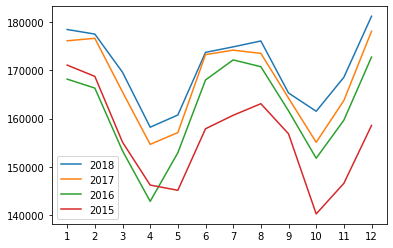

In [ ]:
y1 = final_df.loc[final_df['year'] == 2018].groupby('month')[['eco_max']].mean()
y2 = final_df.loc[final_df['year'] == 2017].groupby('month')[['eco_max']].mean()
y3 = final_df.loc[final_df['year'] == 2016].groupby('month')[['eco_max']].mean()
y4 = final_df.loc[final_df['year'] == 2015].groupby('month')[['eco_max']].mean()
fig, ax = plt.subplots()
ax.set_xticks(np.arange(1,13,1))
plt.plot(y1,label = '2018')
plt.plot(y2,label = '2017')
plt.plot(y3, label = '2016')
plt.plot(y4, label = '2015')
plt.legend()

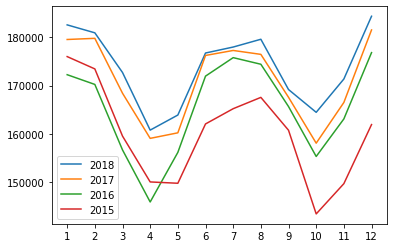

In [ ]:
y1 = final_df.loc[final_df['year'] == 2018].groupby('month')[['emerg_max']].mean()
y2 = final_df.loc[final_df['year'] == 2017].groupby('month')[['emerg_max']].mean()
y3 = final_df.loc[final_df['year'] == 2016].groupby('month')[['emerg_max']].mean()
y4 = final_df.loc[final_df['year'] == 2015].groupby('month')[['emerg_max']].mean()
fig, ax = plt.subplots()
ax.set_xticks(np.arange(1,13,1))
plt.plot(y1,label = '2018')
plt.plot(y2,label = '2017')
plt.plot(y3, label = '2016')
plt.plot(y4, label = '2015')
plt.legend()

There is high correlation between Energymax and Ecomax. We can see the seasonality that it goes down on April, May and October, which can be explained because during summer (June - September), people tend to use air conditioner and during winter November - March, people tend to use heater. Therefore, the energy use will be higher. 

#MODELING - MACHINE LEARNING

##Baseline: Multiple Linear Regression Without Regularization

Use scikit-learn's train_test_split function to split data for regression into train and test sets.

In [ ]:
final_df

,datetime_beginning_utc,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,emerg_max,total_lmp_da,congestion_price_da,marginal_loss_price_da,month,hour,year
0,1/1/2015 5:00:00 AM,27.932043,0.015272,0.016771,174843.2,28.150167,0.042907,-0.002740,1,5,2015
1,1/1/2015 6:00:00 AM,27.924257,0.021155,0.013101,174373.9,27.890196,0.055377,0.004819,1,6,2015
2,1/1/2015 7:00:00 AM,27.360293,0.021703,0.008590,174378.8,27.284051,0.046938,-0.002887,1,7,2015
3,1/1/2015 8:00:00 AM,27.100068,0.018235,0.011833,175390.8,26.471545,0.036696,-0.005151,1,8,2015
4,1/1/2015 9:00:00 AM,26.250975,0.025782,0.015193,175368.3,26.861173,0.036685,-0.005512,1,9,2015
...,...,...,...,...,...,...,...,...,...,...,...
52624,12/31/2016 1:00:00 AM,26.763961,-0.000678,0.004639,185007.8,33.442840,0.236220,0.366620,12,1,2016
52625,12/31/2016 2:00:00 AM,28.104594,0.001908,0.012686,184286.8,31.973737,0.114634,0.309103,12,2,2016
52626,12/31/2016 3:00:00 AM,26.551182,0.004853,0.006329,184415.9,27.379378,0.104945,0.264433,12,3,2016
52627,12/31/2016 4:00:00 AM,26.843044,0.004126,0.008918,183356.4,25.939305,-0.036394,0.205699,12,4,2016


In [ ]:
x = final_df.drop(columns = ['datetime_beginning_utc','total_lmp_rt','month','year','hour'])
y = final_df['total_lmp_rt']
seed = 42 #set seed
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=seed)

In [ ]:
reg = LinearRegression().fit(x_train,y_train)
y_pred = reg.predict(x_test)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))


0.6630028899251795
0.5599971050764758


##Multiple Linear Regression With L2 Regularization since there are multicolinearity between the features

Trying standard scaller before using L2 since the Energymax and ecomax are much larger than real time price

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
reg_ridge = Ridge(alpha=10).fit(x_train,y_train)
y_pred = reg_ridge.predict(x_test)
reg_ridge.score(x_train,y_train)

0.6630028680023671

In [ ]:
reg_ridge.score(x_test,y_test)

0.5600976629356449

##GBM Model

Since model is underfitting, we can use XGBoost Regressor next to boost the performance

##Machine Learning - XGBoost Regressor for underfitting model

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=seed)
xgb = XGBRegressor()
scores = cross_val_score(xgb, x_train, y_train, cv=cv, n_jobs=-1)
print("Accuracy: %.2f%% (%.2f%%)" % (scores.mean()*100, scores.std()*100))

Accuracy: 85.50% (5.02%)


##Search over the parameters to tune XGBoost


In [ ]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
xgb_model = XGBRegressor()

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)

search.fit(x_train, y_train)

report_best_scores(search.cv_results_, 1)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[21:36:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:44] WARNING: /workspace/src/objective/reg

## Retrain model again after searching hyper parameters

In [ ]:
xgb_model = XGBRegressor(max_depth = 3, learning_rate = 0.28,gamma = 0.4,colsample_bytree = 0.9, n_estimators = 132,subsample = 0.85)

# params = {
#     "colsample_bytree": 0.9,
#     "gamma": 0.4,
#     "learning_rate": 0.28, # default 0.1 
#     "max_depth": 3, # default 3
#     "n_estimators": 132, # default 100
#     "subsample": 0.85
# }

xgb_model.fit(x_train, y_train)
cpu_train_score = xgb_model.score(x_train, y_train)
cpu_test_score = xgb_model.score(x_test, y_test)
print(cpu_train_score)
print(cpu_test_score)

[02:59:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9381909524472596
0.8803397175567373


# MODELING - DEEP LEARNING 
Project RNN - LSTM part credit to: https://towardsdatascience.com/building-rnn-lstm-and-gru-for-time-series-using-pytorch-a46e5b094e7b

##Feature Engineering

In [ ]:
final_df = final_df.set_index('datetime_beginning_utc')

In [ ]:
x = final_df.drop(columns = ['total_lmp_rt','month','year','hour'])
y = final_df[['total_lmp_rt']]

Split into Train, Test, Validation

In [ ]:
seed = 42
from sklearn.model_selection import train_test_split
test_ratio = 0.2
val_ratio = test_ratio / (1 - test_ratio)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_ratio, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_ratio, shuffle=False)


In [ ]:
X_val

,congestion_price_rt,marginal_loss_price_rt,emerg_max,total_lmp_da,congestion_price_da,marginal_loss_price_da
datetime_beginning_utc,,,,,,
8/9/2015 3:00:00 AM,0.026403,0.010134,162407.6,26.579561,1.449843,0.059718
8/9/2015 4:00:00 AM,0.010724,0.014737,158695.2,23.755348,1.103212,0.122136
8/9/2015 5:00:00 AM,0.029065,0.011259,159255.2,22.832655,1.013017,0.089638
8/9/2015 6:00:00 AM,0.018668,0.008837,159188.2,21.499874,1.331006,0.058868
8/9/2015 7:00:00 AM,0.013788,0.007332,159062.3,18.780008,1.415494,0.014514
...,...,...,...,...,...,...
10/18/2017 12:00:00 PM,0.020699,0.004586,156012.0,32.383593,1.199083,0.134510
10/18/2017 1:00:00 PM,0.006279,0.004482,154743.4,31.977943,0.928549,0.109394
10/18/2017 2:00:00 PM,0.050009,0.013952,154946.1,31.833154,0.881320,0.121835


Scale the Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler

def get_scaler(scaler):
    scalers = {
        "minmax": MinMaxScaler,
        "standard": StandardScaler,
        "maxabs": MaxAbsScaler,
        "robust": RobustScaler,
    }
    return scalers.get(scaler.lower())()


In [ ]:
scaler = get_scaler('minmax')
X_train_arr = scaler.fit_transform(X_train)
X_val_arr = scaler.transform(X_val)
X_test_arr = scaler.transform(X_test)

y_train_arr = scaler.fit_transform(y_train)
y_val_arr = scaler.transform(y_val)
y_test_arr = scaler.transform(y_test)

Create Train Loader, Val Loader and Test Loader

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

batch_size = 64

train_features = torch.Tensor(X_train_arr)
train_targets = torch.Tensor(y_train_arr)
val_features = torch.Tensor(X_val_arr)
val_targets = torch.Tensor(y_val_arr)
test_features = torch.Tensor(X_test_arr)
test_targets = torch.Tensor(y_test_arr)

train = TensorDataset(train_features, train_targets)
val = TensorDataset(val_features, val_targets)
test = TensorDataset(test_features, test_targets)

train_loader = DataLoader(train, batch_size=batch_size, shuffle=False, drop_last=True)
val_loader = DataLoader(val, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader_one = DataLoader(test, batch_size=1, shuffle=False, drop_last=True)

#Recurrent Network

In [ ]:
class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        """The __init__ method that initiates an RNN instance.

        Args:
            input_dim (int): The number of nodes in the input layer
            hidden_dim (int): The number of nodes in each layer
            layer_dim (int): The number of layers in the network
            output_dim (int): The number of nodes in the output layer
            dropout_prob (float): The probability of nodes being dropped out

        """
        super(RNNModel, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # RNN layers
        self.rnn = nn.RNN(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        """The forward method takes input tensor x and does forward propagation

        Args:
            x (torch.Tensor): The input tensor of the shape (batch size, sequence length, input_dim)

        Returns:
            torch.Tensor: The output tensor of the shape (batch size, output_dim)

        """
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Forward propagation by passing in the input and hidden state into the model
        out, h0 = self.rnn(x, h0.detach())

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        # so that it can fit into the fully connected layer
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)
        return out

#LSTM Model

In [ ]:
class LSTMModel(nn.Module):
    """LSTMModel class extends nn.Module class and works as a constructor for LSTMs.

       LSTMModel class initiates a LSTM module based on PyTorch's nn.Module class.
       It has only two methods, namely init() and forward(). While the init()
       method initiates the model with the given input parameters, the forward()
       method defines how the forward propagation needs to be calculated.
       Since PyTorch automatically defines back propagation, there is no need
       to define back propagation method.

       Attributes:
           hidden_dim (int): The number of nodes in each layer
           layer_dim (str): The number of layers in the network
           lstm (nn.LSTM): The LSTM model constructed with the input parameters.
           fc (nn.Linear): The fully connected layer to convert the final state
                           of LSTMs to our desired output shape.

    """
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        """The __init__ method that initiates a LSTM instance.

        Args:
            input_dim (int): The number of nodes in the input layer
            hidden_dim (int): The number of nodes in each layer
            layer_dim (int): The number of layers in the network
            output_dim (int): The number of nodes in the output layer
            dropout_prob (float): The probability of nodes being dropped out

        """
        super(LSTMModel, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # LSTM layers
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        """The forward method takes input tensor x and does forward propagation

        Args:
            x (torch.Tensor): The input tensor of the shape (batch size, sequence length, input_dim)

        Returns:
            torch.Tensor: The output tensor of the shape (batch size, output_dim)

        """
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Initializing cell state for first input with zeros
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        # Forward propagation by passing in the input, hidden state, and cell state into the model
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        # so that it can fit into the fully connected layer
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)

        return out

In [ ]:
def get_model(model, model_params):
    models = {
        "rnn": RNNModel,
        'lstm':LSTMModel

    }
    return models.get(model.lower())(**model_params)

##Define Train Function

In [ ]:
class Optimization:
    """Optimization is a helper class that allows training, validation, prediction.

    Optimization is a helper class that takes model, loss function, optimizer function
    learning scheduler (optional), early stopping (optional) as inputs. In return, it
    provides a framework to train and validate the models, and to predict future values
    based on the models.

    Attributes:
        model (RNNModel, LSTMModel, GRUModel): Model class created for the type of RNN
        loss_fn (torch.nn.modules.Loss): Loss function to calculate the losses
        optimizer (torch.optim.Optimizer): Optimizer function to optimize the loss function
        train_losses (list[float]): The loss values from the training
        val_losses (list[float]): The loss values from the validation
        last_epoch (int): The number of epochs that the models is trained
    """
    def __init__(self, model, loss_fn, optimizer):
        """
        Args:
            model (RNNModel, LSTMModel, GRUModel): Model class created for the type of RNN
            loss_fn (torch.nn.modules.Loss): Loss function to calculate the losses
            optimizer (torch.optim.Optimizer): Optimizer function to optimize the loss function
        """
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.train_losses = []
        self.val_losses = []
        
    def train_step(self, x, y):
        """The method train_step completes one step of training.

        Given the features (x) and the target values (y) tensors, the method completes
        one step of the training. First, it activates the train mode to enable back prop.
        After generating predicted values (yhat) by doing forward propagation, it calculates
        the losses by using the loss function. Then, it computes the gradients by doing
        back propagation and updates the weights by calling step() function.

        Args:
            x (torch.Tensor): Tensor for features to train one step
            y (torch.Tensor): Tensor for target values to calculate losses

        """
        # Sets model to train mode
        self.model.train()

        # Makes predictions
        yhat = self.model(x)

        # Computes loss
        loss = self.loss_fn(y, yhat)

        # Computes gradients
        loss.backward()

        # Updates parameters and zeroes gradients
        self.optimizer.step()
        self.optimizer.zero_grad()

        # Returns the loss
        return loss.item()

    def train(self, train_loader, val_loader, batch_size=64, n_epochs=50, n_features=1):
        """The method train performs the model training

        The method takes DataLoaders for training and validation datasets, batch size for
        mini-batch training, number of epochs to train, and number of features as inputs.
        Then, it carries out the training by iteratively calling the method train_step for
        n_epochs times. If early stopping is enabled, then it  checks the stopping condition
        to decide whether the training needs to halt before n_epochs steps. Finally, it saves
        the model in a designated file path.

        Args:
            train_loader (torch.utils.data.DataLoader): DataLoader that stores training data
            val_loader (torch.utils.data.DataLoader): DataLoader that stores validation data
            batch_size (int): Batch size for mini-batch training
            n_epochs (int): Number of epochs, i.e., train steps, to train
            n_features (int): Number of feature columns

        """
        model_path = f'{self.model}_{datetime.now().strftime("%Y-%m-%d %H:%M:%S")}'

        for epoch in range(1, n_epochs + 1):
            batch_losses = []
            for x_batch, y_batch in train_loader:
                x_batch = x_batch.view([batch_size, -1, n_features]).to(device)
                y_batch = y_batch.to(device)
                loss = self.train_step(x_batch, y_batch)
                batch_losses.append(loss)
            training_loss = np.mean(batch_losses)
            self.train_losses.append(training_loss)

            with torch.no_grad():
                batch_val_losses = []
                for x_val, y_val in val_loader:
                    x_val = x_val.view([batch_size, -1, n_features]).to(device)
                    y_val = y_val.to(device)
                    self.model.eval()
                    yhat = self.model(x_val)
                    val_loss = self.loss_fn(y_val, yhat).item()
                    batch_val_losses.append(val_loss)
                validation_loss = np.mean(batch_val_losses)
                self.val_losses.append(validation_loss)

            if (epoch <= 10) | (epoch % 50 == 0):
                print(
                    f"[{epoch}/{n_epochs}] Training loss: {training_loss:.4f}\t Validation loss: {validation_loss:.4f}"
                )

        torch.save(self.model.state_dict(), model_path)

    def evaluate(self, test_loader, batch_size=1, n_features=1):
        """The method evaluate performs the model evaluation

        The method takes DataLoaders for the test dataset, batch size for mini-batch testing,
        and number of features as inputs. Similar to the model validation, it iteratively
        predicts the target values and calculates losses. Then, it returns two lists that
        hold the predictions and the actual values.

        Note:
            This method assumes that the prediction from the previous step is available at
            the time of the prediction, and only does one-step prediction into the future.

        Args:
            test_loader (torch.utils.data.DataLoader): DataLoader that stores test data
            batch_size (int): Batch size for mini-batch training
            n_features (int): Number of feature columns

        Returns:
            list[float]: The values predicted by the model
            list[float]: The actual values in the test set.

        """
        with torch.no_grad():
            predictions = []
            values = []
            for x_test, y_test in test_loader:
                x_test = x_test.view([batch_size, -1, n_features]).to(device)
                y_test = y_test.to(device)
                self.model.eval()
                yhat = self.model(x_test)
                predictions.append(yhat.to(device).detach().numpy())
                values.append(y_test.to(device).detach().numpy())

        return predictions, values

    def plot_losses(self):
        """The method plots the calculated loss values for training and validation
        """
        plt.plot(self.train_losses, label="Training loss")
        plt.plot(self.val_losses, label="Validation loss")
        plt.legend()
        plt.title("Losses")
        plt.show()
        plt.close()

#RNN Training

[1/20] Training loss: 0.0007	 Validation loss: 0.0001
[2/20] Training loss: 0.0003	 Validation loss: 0.0001
[3/20] Training loss: 0.0004	 Validation loss: 0.0001
[4/20] Training loss: 0.0004	 Validation loss: 0.0001
[5/20] Training loss: 0.0003	 Validation loss: 0.0001
[6/20] Training loss: 0.0003	 Validation loss: 0.0001
[7/20] Training loss: 0.0003	 Validation loss: 0.0001
[8/20] Training loss: 0.0003	 Validation loss: 0.0001
[9/20] Training loss: 0.0003	 Validation loss: 0.0001
[10/20] Training loss: 0.0003	 Validation loss: 0.0001


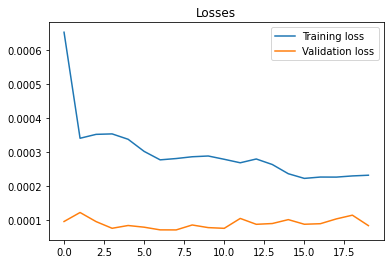

In [ ]:
import torch.optim as optim

input_dim = len(X_train.columns)
output_dim = 1
hidden_dim = 64
layer_dim = 3
batch_size = 64
dropout = 0.2
n_epochs = 20
learning_rate = 1e-3
weight_decay = 1e-6

model_params = {'input_dim': input_dim,
                'hidden_dim' : hidden_dim,
                'layer_dim' : layer_dim,
                'output_dim' : output_dim,
                'dropout_prob' : dropout}

model = get_model('rnn', model_params)

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)


opt = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
opt.train(train_loader, val_loader, batch_size=batch_size, n_epochs=n_epochs, n_features=input_dim)
opt.plot_losses()

predictions, values = opt.evaluate(
    test_loader_one,
    batch_size=1,
    n_features=input_dim
)

In [ ]:
def inverse_transform(scaler, df, columns):
    for col in columns:
        df[col] = scaler.inverse_transform(df[col])
    return df


def format_predictions(predictions, values, df_test, scaler):
    vals = np.concatenate(values, axis=0).ravel()
    preds = np.concatenate(predictions, axis=0).ravel()
    df_result = pd.DataFrame(data={"value": vals, "prediction": preds}, index=df_test.head(len(vals)).index)
    df_result = df_result.sort_index()
    df_result = inverse_transform(scaler, df_result, [["value", "prediction"]])
    return df_result


df_result = format_predictions(predictions, values, X_test, scaler)
df_result

,value,prediction
datetime_beginning_utc,,
1/1/2016 10:00:00 AM,14.475466,18.083347
1/1/2016 10:00:00 PM,24.117353,26.826038
1/1/2016 11:00:00 AM,15.488896,20.874575
1/1/2016 11:00:00 PM,24.071869,25.478838
1/1/2016 12:00:00 PM,1.072535,19.684008
...,...,...
9/9/2016 7:00:00 PM,44.551228,45.827332
9/9/2016 8:00:00 AM,21.556166,21.507982
9/9/2016 8:00:00 PM,63.036819,48.959473


#RNN Test Accuracy

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_metrics(df):
    result_metrics = {'mae' : mean_absolute_error(df.value, df.prediction),
                      'rmse' : mean_squared_error(df.value, df.prediction) ** 0.5,
                      'r2' : r2_score(df.value, df.prediction)}
    
    print("Mean Absolute Error:       ", result_metrics["mae"])
    print("Root Mean Squared Error:   ", result_metrics["rmse"])
    print("R^2 Score:                 ", result_metrics["r2"])
    return result_metrics

result_metrics = calculate_metrics(df_result)


Mean Absolute Error:        7.251034
Root Mean Squared Error:    12.039163261056276
R^2 Score:                  0.31296884667151725


#LSTM Training

[1/20] Training loss: 0.0005	 Validation loss: 0.0001
[2/20] Training loss: 0.0004	 Validation loss: 0.0001
[3/20] Training loss: 0.0004	 Validation loss: 0.0001
[4/20] Training loss: 0.0003	 Validation loss: 0.0001
[5/20] Training loss: 0.0003	 Validation loss: 0.0001
[6/20] Training loss: 0.0003	 Validation loss: 0.0001
[7/20] Training loss: 0.0003	 Validation loss: 0.0001
[8/20] Training loss: 0.0002	 Validation loss: 0.0001
[9/20] Training loss: 0.0002	 Validation loss: 0.0001
[10/20] Training loss: 0.0002	 Validation loss: 0.0001


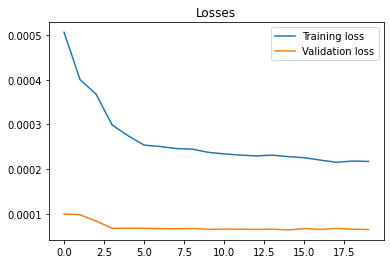

In [ ]:
import torch.optim as optim

input_dim = len(X_train.columns)
output_dim = 1
hidden_dim = 64
layer_dim = 3
batch_size = 64
dropout = 0.2
n_epochs = 20
learning_rate = 1e-3
weight_decay = 1e-6

model_params = {'input_dim': input_dim,
                'hidden_dim' : hidden_dim,
                'layer_dim' : layer_dim,
                'output_dim' : output_dim,
                'dropout_prob' : dropout}

model = get_model('lstm', model_params)

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)


opt = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
opt.train(train_loader, val_loader, batch_size=batch_size, n_epochs=n_epochs, n_features=input_dim)
opt.plot_losses()

predictions, values = opt.evaluate(
    test_loader_one,
    batch_size=1,
    n_features=input_dim
)

In [ ]:
def inverse_transform(scaler, df, columns):
    for col in columns:
        df[col] = scaler.inverse_transform(df[col])
    return df


def format_predictions(predictions, values, df_test, scaler):
    vals = np.concatenate(values, axis=0).ravel()
    preds = np.concatenate(predictions, axis=0).ravel()
    df_result = pd.DataFrame(data={"value": vals, "prediction": preds}, index=df_test.head(len(vals)).index)
    df_result = df_result.sort_index()
    df_result = inverse_transform(scaler, df_result, [["value", "prediction"]])
    return df_result


df_result = format_predictions(predictions, values, X_test, scaler)
df_result

,value,prediction
datetime_beginning_utc,,
1/1/2016 10:00:00 AM,14.475466,12.909936
1/1/2016 10:00:00 PM,24.117353,25.418312
1/1/2016 11:00:00 AM,15.488896,16.085970
1/1/2016 11:00:00 PM,24.071869,23.995605
1/1/2016 12:00:00 PM,1.072535,15.582502
...,...,...
9/9/2016 7:00:00 PM,44.551228,58.749935
9/9/2016 8:00:00 AM,21.556166,16.283503
9/9/2016 8:00:00 PM,63.036819,62.170902


#LSTM Test Accuracy

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_metrics(df):
    result_metrics = {'mae' : mean_absolute_error(df.value, df.prediction),
                      'rmse' : mean_squared_error(df.value, df.prediction) ** 0.5,
                      'r2' : r2_score(df.value, df.prediction)}
    
    print("Mean Absolute Error:       ", result_metrics["mae"])
    print("Root Mean Squared Error:   ", result_metrics["rmse"])
    print("R^2 Score:                 ", result_metrics["r2"])
    return result_metrics

result_metrics = calculate_metrics(df_result)


Mean Absolute Error:        6.86482
Root Mean Squared Error:    11.7191647062038
R^2 Score:                  0.3490058220705188


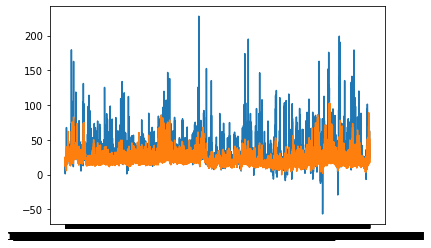

In [ ]:
x = df_result['value']
y = df_result['prediction']
plt.plot(x)
plt.plot(y)

In [ ]:
# # x_train = x_train.values.tolist()
# # y_train = y_train.values.tolist()
# # train_data = []
# # for i in range(len(x_train)):
# #   train_data.append([x_train[i], y_train[i]])
# # x_test = x_test.values.tolist()
# # y_test = y_test.values.tolist()
# # test_data = []
# # for i in range(len(x_test)):
# #   test_data.append([x_test[i], y_test[i]])


# x_train = x_train.tolist()
# y_train = y_train.tolist()
# train_data = []
# for i in range(len(x_train)):
#   train_data.append([x_train[i], y_train[i]])
# x_test = x_test.tolist()
# y_test = y_test.tolist()
# test_data = []
# for i in range(len(x_test)):
#   test_data.append([x_test[i], y_test[i]])

In [ ]:
# import torch
# from torch import nn
# from torch.utils.data import DataLoader
# from sklearn.preprocessing import StandardScaler
# torch.manual_seed(42) 
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# print(torch.__version__)
# print(device)

1.13.1+cu116
cpu


In [ ]:
# from torch.utils.data import DataLoader, TensorDataset
# from torch import Tensor
# train_data = TensorDataset(Tensor(x_train), Tensor(y_train))
# test_data = TensorDataset(Tensor(x_test), Tensor(y_test))

In [ ]:
# test_data[1][0].shape

torch.Size([8])

In [ ]:
# class RNNModel(nn.Module):
#     def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
#         """The __init__ method that initiates an RNN instance.

#         Args:
#             input_dim (int): The number of nodes in the input layer
#             hidden_dim (int): The number of nodes in each layer
#             layer_dim (int): The number of layers in the network
#             output_dim (int): The number of nodes in the output layer
#             dropout_prob (float): The probability of nodes being dropped out

#         """
#         super(RNNModel, self).__init__()

#         # Defining the number of layers and the nodes in each layer
#         self.hidden_dim = hidden_dim
#         self.layer_dim = layer_dim

#         # RNN layers
#         self.rnn = nn.RNN(
#             input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
#         )
#         # Fully connected layer
#         self.fc = nn.Linear(hidden_dim, output_dim)

#     def forward(self, x):
#         """The forward method takes input tensor x and does forward propagation

#         Args:
#             x (torch.Tensor): The input tensor of the shape (batch size, sequence length, input_dim)

#         Returns:
#             torch.Tensor: The output tensor of the shape (batch size, output_dim)

#         """
#         # Initializing hidden state for first input with zeros
#         h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

#         # Forward propagation by passing in the input and hidden state into the model
#         out, h0 = self.rnn(x, h0.detach())

#         # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
#         # so that it can fit into the fully connected layer
#         out = out[:, -1, :]

#         # Convert the final state to our desired output shape (batch_size, output_dim)
#         out = self.fc(out)
#         return out

In [ ]:
# def get_model(model, model_params):
#     models = {
#         "rnn": RNNModel,

#     }
#     return models.get(model.lower())(**model_params)

In [ ]:
# class Optimization:
#     """Optimization is a helper class that allows training, validation, prediction.

#     Optimization is a helper class that takes model, loss function, optimizer function
#     learning scheduler (optional), early stopping (optional) as inputs. In return, it
#     provides a framework to train and validate the models, and to predict future values
#     based on the models.

#     Attributes:
#         model (RNNModel, LSTMModel, GRUModel): Model class created for the type of RNN
#         loss_fn (torch.nn.modules.Loss): Loss function to calculate the losses
#         optimizer (torch.optim.Optimizer): Optimizer function to optimize the loss function
#         train_losses (list[float]): The loss values from the training
#         val_losses (list[float]): The loss values from the validation
#         last_epoch (int): The number of epochs that the models is trained
#     """
#     def __init__(self, model, loss_fn, optimizer):
#         """
#         Args:
#             model (RNNModel, LSTMModel, GRUModel): Model class created for the type of RNN
#             loss_fn (torch.nn.modules.Loss): Loss function to calculate the losses
#             optimizer (torch.optim.Optimizer): Optimizer function to optimize the loss function
#         """
#         self.model = model
#         self.loss_fn = loss_fn
#         self.optimizer = optimizer
#         self.train_losses = []
#         self.val_losses = []
        
#     def train_step(self, x, y):
#         """The method train_step completes one step of training.

#         Given the features (x) and the target values (y) tensors, the method completes
#         one step of the training. First, it activates the train mode to enable back prop.
#         After generating predicted values (yhat) by doing forward propagation, it calculates
#         the losses by using the loss function. Then, it computes the gradients by doing
#         back propagation and updates the weights by calling step() function.

#         Args:
#             x (torch.Tensor): Tensor for features to train one step
#             y (torch.Tensor): Tensor for target values to calculate losses

#         """
#         # Sets model to train mode
#         self.model.train()

#         # Makes predictions
#         yhat = self.model(x)

#         # Computes loss
#         loss = self.loss_fn(y, yhat)

#         # Computes gradients
#         loss.backward()

#         # Updates parameters and zeroes gradients
#         self.optimizer.step()
#         self.optimizer.zero_grad()

#         # Returns the loss
#         return loss.item()

#     def train(self, train_loader, val_loader, batch_size=64, n_epochs=50, n_features=1):
#         """The method train performs the model training

#         The method takes DataLoaders for training and validation datasets, batch size for
#         mini-batch training, number of epochs to train, and number of features as inputs.
#         Then, it carries out the training by iteratively calling the method train_step for
#         n_epochs times. If early stopping is enabled, then it  checks the stopping condition
#         to decide whether the training needs to halt before n_epochs steps. Finally, it saves
#         the model in a designated file path.

#         Args:
#             train_loader (torch.utils.data.DataLoader): DataLoader that stores training data
#             val_loader (torch.utils.data.DataLoader): DataLoader that stores validation data
#             batch_size (int): Batch size for mini-batch training
#             n_epochs (int): Number of epochs, i.e., train steps, to train
#             n_features (int): Number of feature columns

#         """
#         model_path = f'{self.model}_{datetime.now().strftime("%Y-%m-%d %H:%M:%S")}'

#         for epoch in range(1, n_epochs + 1):
#             batch_losses = []
#             for x_batch, y_batch in train_loader:
#                 x_batch = x_batch.view([batch_size, -1, n_features]).to(device)
#                 y_batch = y_batch.to(device)
#                 loss = self.train_step(x_batch, y_batch)
#                 batch_losses.append(loss)
#             training_loss = np.mean(batch_losses)
#             self.train_losses.append(training_loss)

#             with torch.no_grad():
#                 batch_val_losses = []
#                 for x_val, y_val in val_loader:
#                     x_val = x_val.view([batch_size, -1, n_features]).to(device)
#                     y_val = y_val.to(device)
#                     self.model.eval()
#                     yhat = self.model(x_val)
#                     val_loss = self.loss_fn(y_val, yhat).item()
#                     batch_val_losses.append(val_loss)
#                 validation_loss = np.mean(batch_val_losses)
#                 self.val_losses.append(validation_loss)

#             if (epoch <= 10) | (epoch % 50 == 0):
#                 print(
#                     f"[{epoch}/{n_epochs}] Training loss: {training_loss:.4f}\t Validation loss: {validation_loss:.4f}"
#                 )

#         torch.save(self.model.state_dict(), model_path)

#     def evaluate(self, test_loader, batch_size=1, n_features=1):
#         """The method evaluate performs the model evaluation

#         The method takes DataLoaders for the test dataset, batch size for mini-batch testing,
#         and number of features as inputs. Similar to the model validation, it iteratively
#         predicts the target values and calculates losses. Then, it returns two lists that
#         hold the predictions and the actual values.

#         Note:
#             This method assumes that the prediction from the previous step is available at
#             the time of the prediction, and only does one-step prediction into the future.

#         Args:
#             test_loader (torch.utils.data.DataLoader): DataLoader that stores test data
#             batch_size (int): Batch size for mini-batch training
#             n_features (int): Number of feature columns

#         Returns:
#             list[float]: The values predicted by the model
#             list[float]: The actual values in the test set.

#         """
#         with torch.no_grad():
#             predictions = []
#             values = []
#             for x_test, y_test in test_loader:
#                 x_test = x_test.view([batch_size, -1, n_features]).to(device)
#                 y_test = y_test.to(device)
#                 self.model.eval()
#                 yhat = self.model(x_test)
#                 predictions.append(yhat.to(device).detach().numpy())
#                 values.append(y_test.to(device).detach().numpy())

#         return predictions, values

#     def plot_losses(self):
#         """The method plots the calculated loss values for training and validation
#         """
#         plt.plot(self.train_losses, label="Training loss")
#         plt.plot(self.val_losses, label="Validation loss")
#         plt.legend()
#         plt.title("Losses")
#         plt.show()
#         plt.close()

In [ ]:
# import torch.optim as optim

# input_dim = len(X_train.columns)
# output_dim = 1
# hidden_dim = 64
# layer_dim = 3
# batch_size = 64
# dropout = 0.2
# n_epochs = 20
# learning_rate = 1e-3
# weight_decay = 1e-6

# model_params = {'input_dim': input_dim,
#                 'hidden_dim' : hidden_dim,
#                 'layer_dim' : layer_dim,
#                 'output_dim' : output_dim,
#                 'dropout_prob' : dropout}

# model = get_model('lstm', model_params)

# loss_fn = nn.MSELoss(reduction="mean")
# optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)


# opt = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
# opt.train(train_loader, val_loader, batch_size=batch_size, n_epochs=n_epochs, n_features=input_dim)
# opt.plot_losses()

# predictions, values = opt.evaluate(
#     test_loader_one,
#     batch_size=1,
#     n_features=input_dim
# )

In [ ]:
# import torch
# from torch import nn
# from torch.utils.data import DataLoader
# from sklearn.preprocessing import StandardScaler



# hidden_dim =84
# n_layers = 3
# input_size = 8
# output_size = 1

# class RNNModel(nn.Module):
#     def __init__(self, input_size, hidden_dim, n_layers, output_size):
#         super().__init__()
#         #Defining the layers
#         # RNN Layer
#         self.rnn = torch.nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)   
#         # Fully connected layer
#         self.fc = nn.Linear(hidden_dim, output_size)
    
#     def forward(self, x):
#         h = self.rnn(x)[0]
#         x = self.fc(h)
#         return x

#   # Set fixed random number seed
# torch.manual_seed(42)

# trainloader = torch.utils.data.DataLoader(train_data, batch_size=84, shuffle=False, num_workers=0)
# testloader = torch.utils.data.DataLoader(test_data, batch_size=84, shuffle=False, num_workers=0)
  

# #trainloader = torch.utils.data.DataLoader([[x_train[i], y_train[i]] for i in range(len(y_train))], shuffle=True, batch_size=100)

# # Initialize the MLP
# model = RNNModel(input_size, hidden_dim, n_layers, output_size).to(device) 
# # Define the loss function and optimizer
# loss_function = nn.MSELoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# # Run the training loop
# acc_LIST = []
# loss_LIST = []
# acc_LIST_RNN = []
# loss_LIST_RNN = []

# for epoch in range(0, 4):
#   running_loss = 0.0
#   correct = 0
#   total = 0

  
#   # Print epoch
#   print(f'Starting epoch {epoch+1}')
  
#   # Iterate over the DataLoader for training data
#   #for inputs, labels in enumerate(trainloader, 0):
  
#   for i, data in enumerate(trainloader, 0):
#     running_loss = 0.0
#     # Get and prepare inputs
#     # labels = labels.type(torch.LongTensor) # Cast to Float
#     # inputs, labels = inputs.to(device), labels.to(device)
#     inputs, labels = data

    
#     # Zero the gradients
#     optimizer.zero_grad()
    
#     # Perform forward pass
#     outputs = model(inputs)
    
#     # Compute loss
#     loss = loss_function(outputs, labels)
    
#     # Perform backward pass
#     loss.backward()

#     running_loss += loss.item()
#     predicted = outputs

#     loss_LIST_RNN.append(running_loss / len(trainloader) ) # get the avg loss for each epoch
  
#   # END TODO 

#   # print statistics
#   print("The loss for Epoch {} is: {}".format(epoch, running_loss/len(trainloader)))



Starting epoch 1
The loss for Epoch 0 is: 1.368376725874607
Starting epoch 2
The loss for Epoch 1 is: 1.368376725874607
Starting epoch 3
The loss for Epoch 2 is: 1.368376725874607
Starting epoch 4
The loss for Epoch 3 is: 1.368376725874607


In [ ]:
# with torch.no_grad():
#     for i,data in enumerate(testloader,0):
#         inputs, labels = data
#         outputs = model(inputs)

#         test_loss = loss_function(outputs, labels)
#         residuals = labels - outputs
#         ss_res = torch.sum(residuals**2)
#         ss_tot = torch.sum((labels - labels.mean())**2)
#         r2 = 1 - (ss_res / ss_tot)

#     print('R-squared: {:.4f}'.format(r2))
#   # print statistics
#     #print("The loss for Epoch {} is: {}, Accuracy = {}".format(epoch, running_loss/len(trainloader), accuracy))

#TIME SERIES - ARIMA Model

In [236]:
final_df.head()

,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,emerg_max,total_lmp_da,congestion_price_da,marginal_loss_price_da,month,hour,year
datetime_beginning_utc,,,,,,,,,,
1/1/2016 5:00:00 AM,19.370768,0.005884,0.004884,171746.9,20.477209,0.204261,-0.047052,1,5,2016
1/1/2016 6:00:00 AM,16.453073,0.003274,0.009799,170930.4,19.423133,0.219547,-0.076414,1,6,2016
1/1/2016 7:00:00 AM,14.220460,0.007946,0.002514,170863.4,17.244261,0.232292,-0.058031,1,7,2016
1/1/2016 8:00:00 AM,14.584960,0.007564,0.007397,171389.3,17.047802,0.224376,-0.066574,1,8,2016
1/1/2016 9:00:00 AM,15.122876,0.016282,0.006593,171413.8,17.596576,0.277783,-0.051207,1,9,2016


In [237]:
indexedDataset = final_df[['total_lmp_rt']]
indexedDataset.head(5)

,total_lmp_rt
datetime_beginning_utc,
1/1/2016 5:00:00 AM,19.370768
1/1/2016 6:00:00 AM,16.453073
1/1/2016 7:00:00 AM,14.220460
1/1/2016 8:00:00 AM,14.584960
1/1/2016 9:00:00 AM,15.122876


In [238]:
indexedDataset = indexedDataset.reset_index()

In [239]:
indexedDataset['datetime_beginning_utc'] = pd.to_datetime(indexedDataset['datetime_beginning_utc'])

In [240]:
indexedDataset = indexedDataset[indexedDataset['datetime_beginning_utc'].dt.year == 2016]

In [241]:
indexedDataset = indexedDataset.set_index('datetime_beginning_utc')

In [260]:
#Determine rolling statistics
rolmean = indexedDataset.rolling(window=24).mean() 
rolstd = indexedDataset.rolling(window=24).std()
print(rolmean,rolstd)

                        total_lmp_rt
datetime_beginning_utc              
2016-01-01 05:00:00              NaN
2016-01-01 06:00:00              NaN
2016-01-01 07:00:00              NaN
2016-01-01 08:00:00              NaN
2016-01-01 09:00:00              NaN
...                              ...
2016-12-31 01:00:00        27.043215
2016-12-31 02:00:00        27.128791
2016-12-31 03:00:00        27.155925
2016-12-31 04:00:00        27.257960
2016-12-31 05:00:00        27.680687

[8856 rows x 1 columns]                         total_lmp_rt
datetime_beginning_utc              
2016-01-01 05:00:00              NaN
2016-01-01 06:00:00              NaN
2016-01-01 07:00:00              NaN
2016-01-01 08:00:00              NaN
2016-01-01 09:00:00              NaN
...                              ...
2016-12-31 01:00:00         4.751594
2016-12-31 02:00:00         4.751438
2016-12-31 03:00:00         4.745971
2016-12-31 04:00:00         4.710204
2016-12-31 05:00:00         4.850565

[8856 rows x

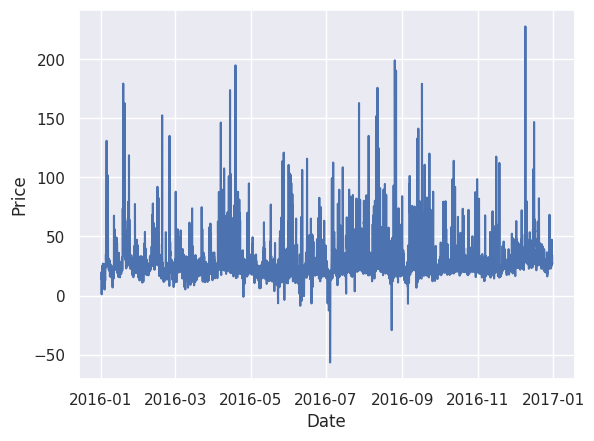

In [261]:
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(indexedDataset)


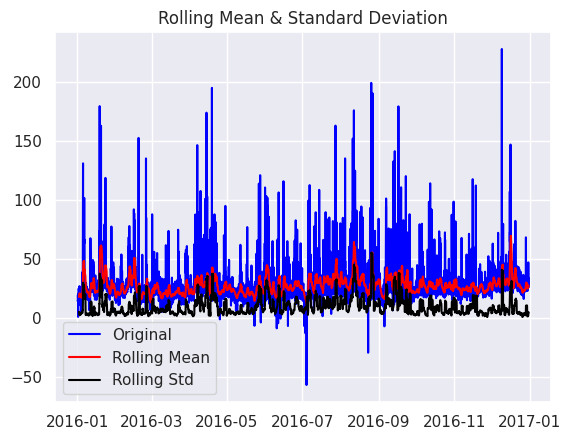

In [262]:
orig = plt.plot(indexedDataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

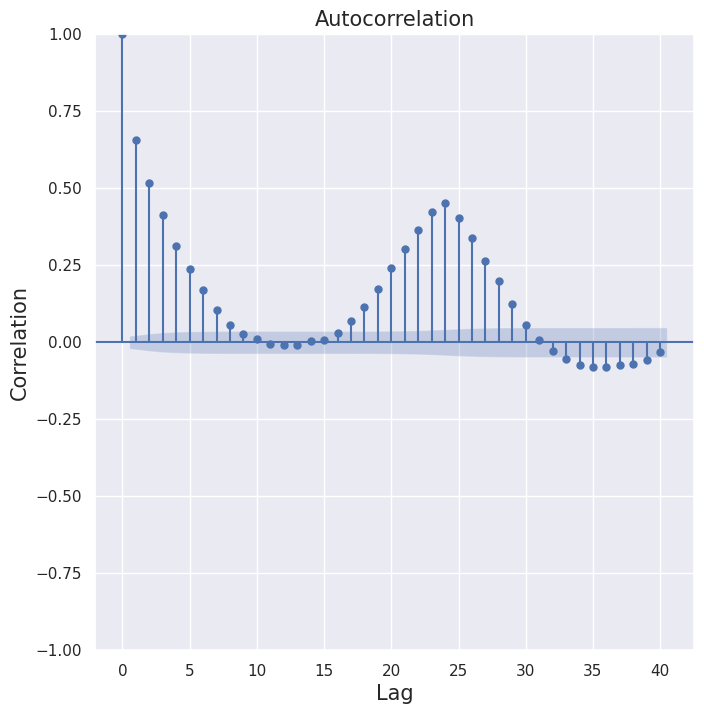

In [263]:
from statsmodels.graphics.tsaplots import plot_acf
green = sns.color_palette("deep",8)[2]
blue = sns.color_palette("deep",8)[0]
fig = plt.figure(figsize=(17,8))
ax2 = fig.add_subplot(122)
plot_acf(indexedDataset.total_lmp_rt,ax=ax2)
plt.title("Autocorrelation", fontsize=15)
plt.xlabel("Lag",fontsize=15)
plt.ylabel("Correlation", fontsize=15)
plt.show()

In [264]:
from statsmodels.tsa.stattools import adfuller
from pandas import Series

def test_stationarity(timeseries, lags=None):
  rolmean = Series.rolling(timeseries, center=False, window=12).mean()
  rolstd = Series.rolling(timeseries, center=False, window=12).std()

  orig = plt.plot(timeseries, color='blue', label='Original')
  mean = plt.plot(rolmean, color='red', label='Rolling Mean')
  std = plt.plot(rolstd, color='black', label='Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block=False)

  print('Results of ADF Test:')
  if lags:
    dftest = adfuller(timeseries, autolag=None, maxlag=lags)
  else:
    dftest = adfuller(timeseries, autolag='AIC')

  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags', 'Observations'])
                     
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)

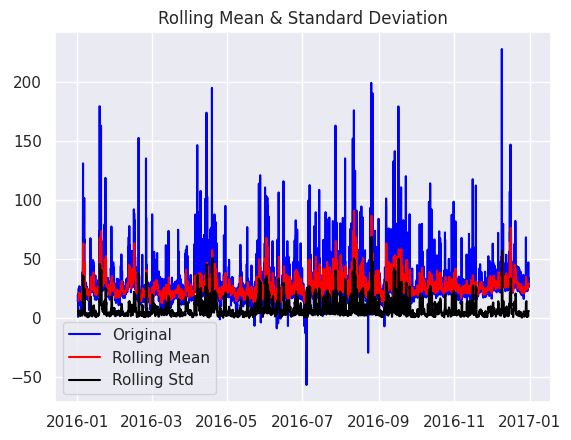

Results of ADF Test:
Test Statistic         -1.043027e+01
p-value                 1.617565e-18
#Lags                   3.300000e+01
Observations            8.822000e+03
Critical Value (1%)    -3.431091e+00
Critical Value (5%)    -2.861868e+00
Critical Value (10%)   -2.566944e+00
dtype: float64


In [265]:
# Defaults to 20 lags, not enough to "see" annual seasonality
test_stationarity(indexedDataset)

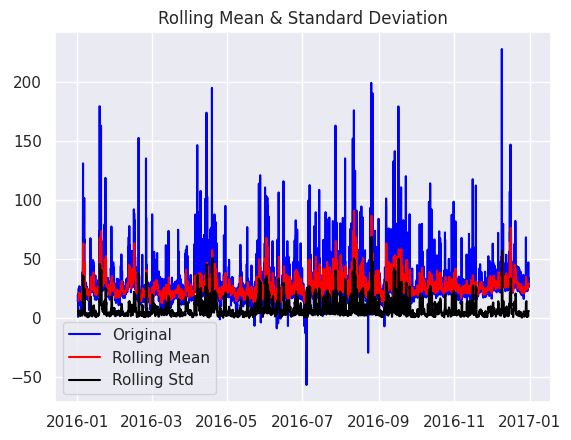

Results of ADF Test:
Test Statistic            -3.515177
p-value                    0.007606
#Lags                    365.000000
Observations            8490.000000
Critical Value (1%)       -3.431120
Critical Value (5%)       -2.861880
Critical Value (10%)      -2.566951
dtype: float64


In [266]:
test_stationarity(indexedDataset,365)

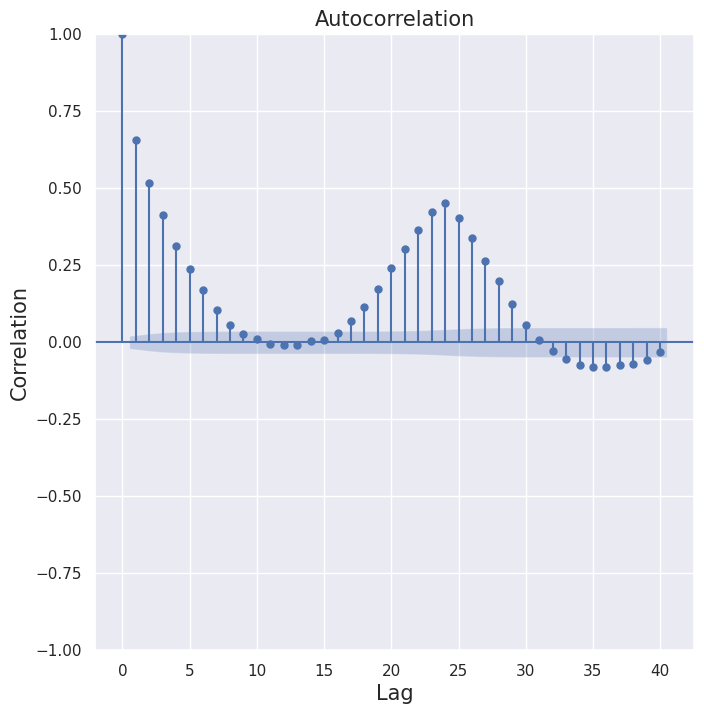

In [267]:
import seaborn as sns
sns.set()
from statsmodels.graphics.tsaplots import plot_acf
green = sns.color_palette("deep",8)[2]
blue = sns.color_palette("deep",8)[0]
fig = plt.figure(figsize=(17,8))
ax2 = fig.add_subplot(122)
plot_acf(indexedDataset.total_lmp_rt,ax=ax2)
plt.title("Autocorrelation", fontsize=15)
plt.xlabel("Lag",fontsize=15)
plt.ylabel("Correlation", fontsize=15)
plt.show()



/usr/local/lib/python3.9/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


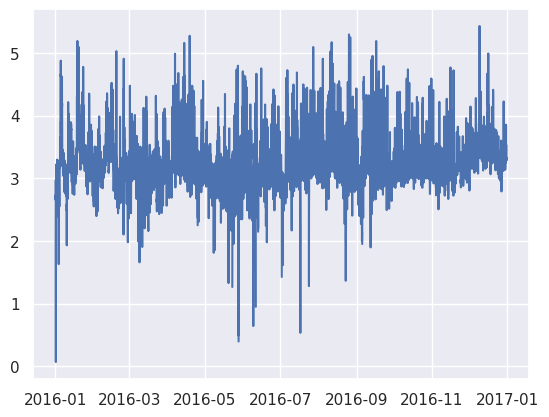

In [268]:
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

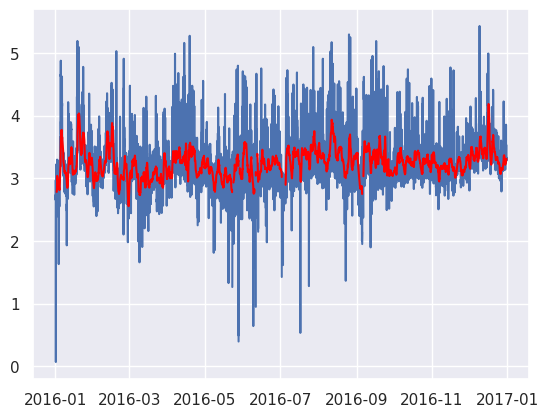

In [269]:
movingAverage = indexedDataset_logScale.rolling(window=24).mean()
movingSTD = indexedDataset_logScale.rolling(window=24).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [270]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)
datasetLogScaleMinusMovingAverage.fillna(0,inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,total_lmp_rt
datetime_beginning_utc,
2016-01-01 05:00:00,0.0
2016-01-01 06:00:00,0.0
2016-01-01 07:00:00,0.0
2016-01-01 08:00:00,0.0
2016-01-01 09:00:00,0.0
2016-01-01 10:00:00,0.0
2016-01-01 11:00:00,0.0
2016-01-01 12:00:00,0.0
2016-01-01 13:00:00,0.0


In [271]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=30).mean()
    movingSTD = timeseries.rolling(window=30).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['total_lmp_rt'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    

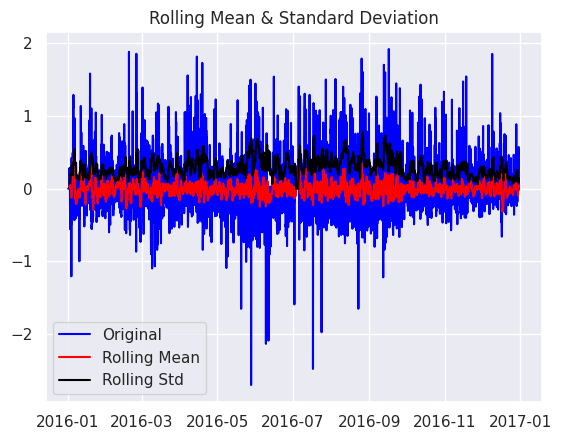

Results of Dickey Fuller Test:
Test Statistic                  -19.472495
p-value                           0.000000
#Lags Used                       37.000000
Number of Observations Used    8818.000000
Critical Value (1%)              -3.431092
Critical Value (5%)              -2.861868
Critical Value (10%)             -2.566944
dtype: float64


In [272]:
test_stationarity(datasetLogScaleMinusMovingAverage)

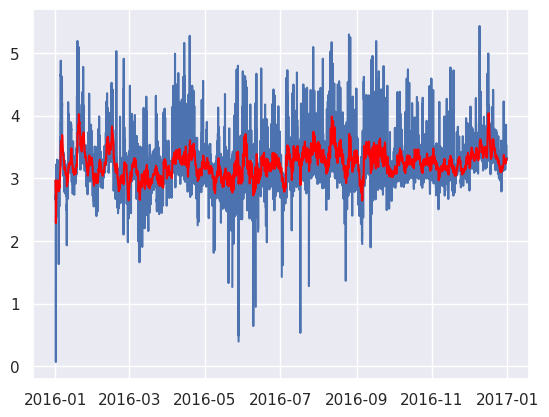

In [273]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

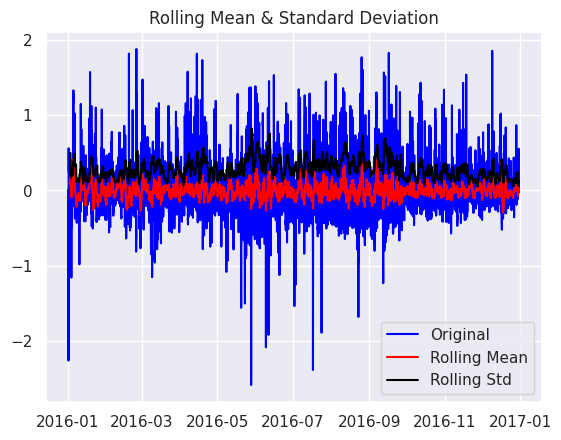

Results of Dickey Fuller Test:
Test Statistic                -1.695703e+01
p-value                        9.368871e-30
#Lags Used                     3.700000e+01
Number of Observations Used    8.800000e+03
Critical Value (1%)           -3.431093e+00
Critical Value (5%)           -2.861868e+00
Critical Value (10%)          -2.566945e+00
dtype: float64


In [274]:
datasetLogScaleMinusExponentialMovingAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
datasetLogScaleMinusExponentialMovingAverage = datasetLogScaleMinusExponentialMovingAverage.dropna()
test_stationarity(datasetLogScaleMinusExponentialMovingAverage)

In [275]:
indexedDataset_logScale = indexedDataset_logScale.fillna(0)

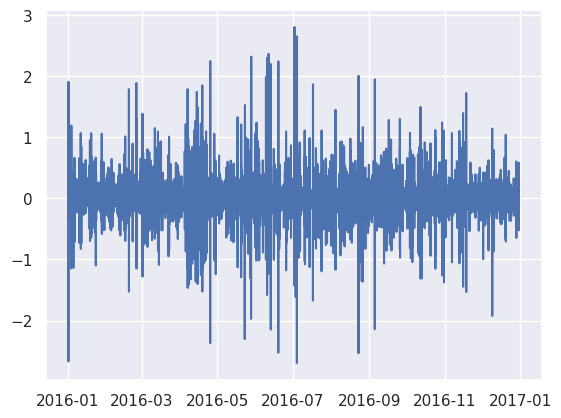

In [276]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

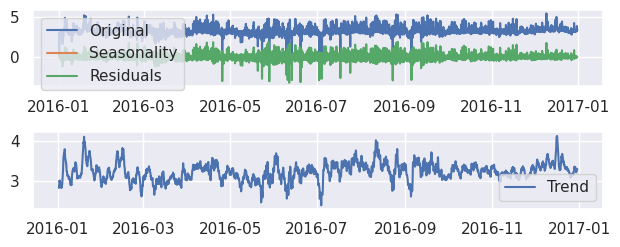

In [277]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale,period=30) 


trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()


decomposedLogData = residual
decomposedLogData.fillna(0,inplace=True)
# test_stationarity(decomposedLogData)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


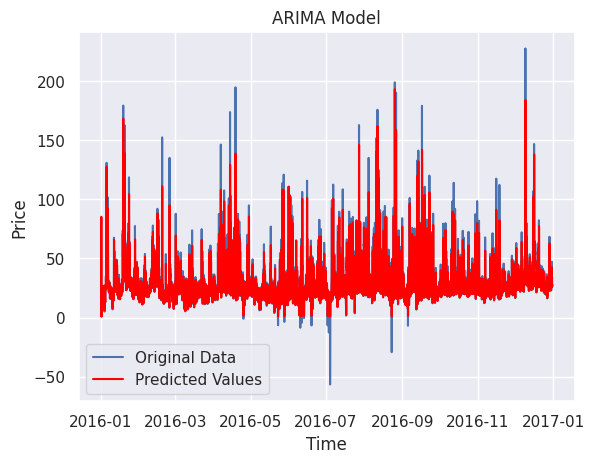

In [282]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load and preprocess the data
# Assume you have a time series data in a DataFrame called 'data' with a column 'Price'
# You may need to import or generate the data before using it in the ARIMA model

# Convert the data to the appropriate format, if needed
# # For example, converting the data to log scale
# indexedDataset_logScale = np.log(data['Price'])

# Fit ARIMA model
model = ARIMA(indexedDataset_logScale, order=(2,1,2))  # Specify the order of ARIMA model
results_ARIMA = model.fit()  # Fit the ARIMA model

# Get the predicted values
predictions_ARIMA = results_ARIMA.predict(start=0, end=len(indexedDataset_logScale)-1, dynamic=False)  
# Replace 'n' with the number of forecasted values you want to generate

# Convert the predicted values back to the original scale, if needed
# For example, converting the log scale predictions back to the original scale
predictions_ARIMA = np.exp(predictions_ARIMA)

# Plot the original data and the predicted values
plt.plot(indexedDataset['total_lmp_rt'])
plt.plot(predictions_ARIMA, color='red')
plt.title('ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(['Original Data', 'Predicted Values'])
plt.show()


In [280]:
real_value = indexedDataset['total_lmp_rt']
residuals = real_value  - predictions_ARIMA

# Calculate SSR (Sum of Squared Residuals)
ssr = np.sum(residuals**2)

# Calculate TSS (Total Sum of Squares)
mean_observed = np.mean(real_value)
tss = np.sum((real_value - mean_observed)**2)

# Calculate R-squared
r_squared = 1 - (ssr / tss)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(real_value, predictions_ARIMA)

print("R-squared: ", r_squared)
print("MSE: ", mse)

R-squared:  0.45424084076590054
MSE:  118.62374659782802


#Grid search

In [287]:

# Define the hyperparameter grid for ARIMA
p_values = [0, 1, 2, 3,4]  # Autoregressive order
d_values = [0, 1]  # Differencing order
q_values = [0, 1, 2, 3,4]  # Moving average order

# Loop through different hyperparameter combinations
best_aic = float('inf')  # Initialize AIC to a high value
best_params = None  # Initialize best hyperparameters to None
y = indexedDataset_logScale
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                # Fit ARIMA model
                model = ARIMA(y, order=(p, d, q))
                results = model.fit()

                # Calculate AIC
                aic = results.aic

                # Update best hyperparameters if AIC is lower
                if aic < best_aic:
                    best_aic = aic
                    best_params = (p, d, q)
            except:
                continue

# Print the best hyperparameters and corresponding AIC score
print("Best ARIMA Hyperparameters: ", best_params)
print("Best AIC Score: ", best_aic)


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr

Best ARIMA Hyperparameters:  (4, 0, 4)
Best AIC Score:  672.9147477762897


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


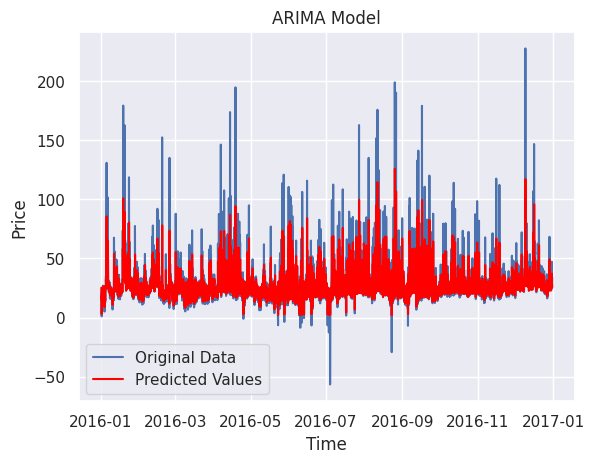

In [288]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load and preprocess the data
# Assume you have a time series data in a DataFrame called 'data' with a column 'Price'
# You may need to import or generate the data before using it in the ARIMA model

# Convert the data to the appropriate format, if needed
# # For example, converting the data to log scale
# indexedDataset_logScale = np.log(data['Price'])

# Fit ARIMA model
model = ARIMA(indexedDataset_logScale, order=(4,0,4))  # Specify the order of ARIMA model
results_ARIMA = model.fit()  # Fit the ARIMA model

# Get the predicted values
predictions_ARIMA = results_ARIMA.predict(start=0, end=len(indexedDataset_logScale)-1, dynamic=False)  
# Replace 'n' with the number of forecasted values you want to generate

# Convert the predicted values back to the original scale, if needed
# For example, converting the log scale predictions back to the original scale
predictions_ARIMA = np.exp(predictions_ARIMA)

# Plot the original data and the predicted values
plt.plot(indexedDataset['total_lmp_rt'])
plt.plot(predictions_ARIMA, color='red')
plt.title('ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(['Original Data', 'Predicted Values'])
plt.show()


In [289]:
real_value = indexedDataset['total_lmp_rt']
residuals = real_value  - predictions_ARIMA

# Calculate SSR (Sum of Squared Residuals)
ssr = np.sum(residuals**2)

# Calculate TSS (Total Sum of Squares)
mean_observed = np.mean(real_value)
tss = np.sum((real_value - mean_observed)**2)

# Calculate R-squared
r_squared = 1 - (ssr / tss)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(real_value, predictions_ARIMA)

print("R-squared: ", r_squared)
print("MSE: ", mse)

R-squared:  0.4905295573830588
MSE:  110.73619500749787
